In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from collections import defaultdict
from math import log
from sklearn.metrics import accuracy_score

In [2]:
path = "messages/part"
SPAM = "spam"
LEGIT = "legit"
def getMarkedFiles(folderNumber):
    curPath = path + str(folderNumber)
    files = []
    for filename in os.listdir(curPath):
        if filename.startswith('.'):
            continue
        file = open(curPath + "/" + filename, 'r')
        subject = list(map(int, file.readline().split()[1:]))
        file.readline()
        text = list(map(int, file.readline().split()))
        if LEGIT in filename:
            files.append((LEGIT, subject))
            files.append((LEGIT, text))
        else:
            files.append((SPAM, subject))
            files.append((SPAM, text))
    return files

<img src="smooth.png" width="300" height="200">

In [3]:
def bayes_model(data):
    freq = defaultdict(lambda:0)
    classes = defaultdict(lambda:0)
    counts = defaultdict(lambda:0)
    #msgType - spam or legit
    for msgType, file in data:
        for word in file:
            freq[msgType, word] += 1.0     #частота встречаемости слов из письма в данном классе
            counts[word] += 1.0            #количество данного слова в сообщении
        classes[msgType] += len(file)       #количество слов у данного класса
    for clazz in classes:
        classes[clazz] /= len(trains)
    return classes, freq, counts

In [4]:
def classify(classifier, file, l_spam, l_legit, alpha):
    classes, freq, counts = classifier
    #argmax(C, P(C)*p(P(x_i|C))) = argmax(C, log(P(C) + sum(log(P(x_i|C))))))
    spam_prob = log(classes[SPAM])
    legit_prob = log(classes[LEGIT])
    for word in file:
        local_spam_prob = (freq[SPAM, word] + alpha) / (counts[word] + alpha * len(counts))
        local_legit_prob = (freq[LEGIT, word] + alpha) / (counts[word] + alpha * len(counts))
        spam_prob += log(local_spam_prob)
        legit_prob += log(local_legit_prob)
    spam_prob += log(l_spam)
    legit_prob += log(l_legit)
    if (spam_prob > legit_prob):
        return SPAM
    return LEGIT

In [5]:
folds = [getMarkedFiles(i) for i in range(1, 11)]
for alpha_deg in range(-8, 1):
    alpha = 10 ** (alpha_deg)
    total_score = 0
    for test in folds:
        meanClassifier = defaultdict(lambda:0), defaultdict(lambda:0)
        train = []
        predict = []
        answer = []
        for trains in folds:
            if trains != test:
                train = train + trains
            bayes = bayes_model(train)
        for clazz, file in test:
            predClass = classify(bayes, file, 1, 1, alpha)
            predict.append(int(predClass == SPAM))
            answer.append(int(clazz == SPAM))
        total_score += (accuracy_score(predict, answer))
    print('alpha - ', alpha, 'accuracy - ', total_score / len(folds))

alpha -  1e-08 accuracy -  0.9422018348623853
alpha -  1e-07 accuracy -  0.9426605504587157
alpha -  1e-06 accuracy -  0.9422018348623853
alpha -  1e-05 accuracy -  0.9422018348623853
alpha -  0.0001 accuracy -  0.9417431192660551
alpha -  0.001 accuracy -  0.9412844036697248
alpha -  0.01 accuracy -  0.9385321100917432
alpha -  0.1 accuracy -  0.9325688073394496
alpha -  1 accuracy -  0.9201834862385321


In [6]:
alpha = 1e-07
for i in range(20, 101, 20):
    lambd = 10 ** i
    sum_score = 0
    noPredictedRealAsSpam = True
    cnt = -1
    for test in folds:
        train = []
        predict = []
        answer = []
        for trains in folds:
            if trains != test:
                train = train + trains
            bayes = bayes_model(train)
        for clazz, file in test:
            predClass = classify(bayes, file, 1, lambd, alpha)
            predict.append(int(predClass == SPAM))
            answer.append(int(clazz == SPAM))
            if (predClass == SPAM and clazz == LEGIT):
                cnt += 1
        sum_score += (accuracy_score(predict, answer))
    print("cnt - ", cnt, "lambda degree- ", i)

cnt -  5 lambda degree-  20
cnt -  2 lambda degree-  40
cnt -  1 lambda degree-  60
cnt -  1 lambda degree-  80
cnt -  0 lambda degree-  100


In [8]:
alpha = 1e-07
sum_score = 0.0
lambds = []
accuracies = []
for i in range(0, 101, 5):
    lambd = 10 ** i
    sum_score = 0
    for test in folds:
        meanClassifier = defaultdict(lambda:0), defaultdict(lambda:0)
        train = []
        predict = []
        answer = []
        for trains in folds:
            if trains != test:
                train = train + trains
            meanClassifier = bayes_model(train)
        for clazz, file in test:
            predClass = classify(meanClassifier, file, 1, lambd, alpha)
            predict.append(int(predClass == SPAM))
            answer.append(int(clazz == SPAM))
        sum_score += (accuracy_score(predict, answer))
    lambds.append(i)
    accuracies.append(sum_score / len(folds))
    print("lambda - ", i, "accuracy - ", sum_score / len(folds))

lambda -  0 accuracy -  0.9426605504587157
lambda -  5 accuracy -  0.8637614678899082
lambda -  10 accuracy -  0.8146788990825689
lambda -  15 accuracy -  0.7811926605504587
lambda -  20 accuracy -  0.7600917431192661
lambda -  25 accuracy -  0.7564220183486239
lambda -  30 accuracy -  0.7536697247706422
lambda -  35 accuracy -  0.7504587155963303
lambda -  40 accuracy -  0.748165137614679
lambda -  45 accuracy -  0.7412844036697248
lambda -  50 accuracy -  0.7366972477064221
lambda -  55 accuracy -  0.7339449541284403
lambda -  60 accuracy -  0.728440366972477
lambda -  65 accuracy -  0.7270642201834863
lambda -  70 accuracy -  0.7247706422018347
lambda -  75 accuracy -  0.7206422018348624
lambda -  80 accuracy -  0.7169724770642201
lambda -  85 accuracy -  0.7155963302752293
lambda -  90 accuracy -  0.7128440366972477
lambda -  95 accuracy -  0.7110091743119266
lambda -  100 accuracy -  0.706880733944954


Text(0, 0.5, 'Accuracy')

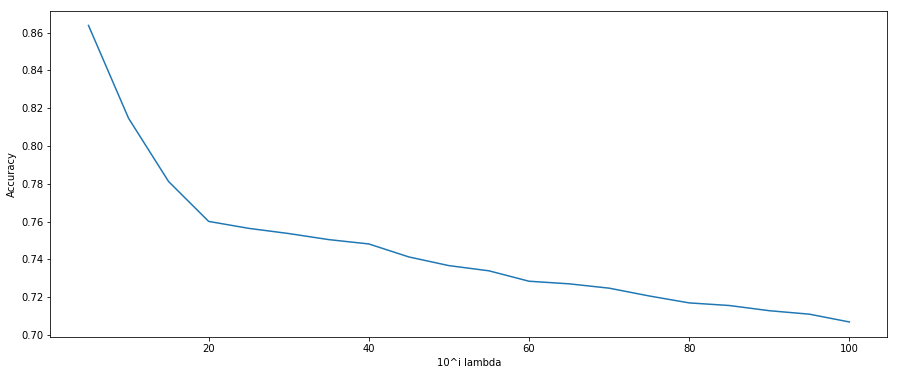

In [9]:
plt.figure(figsize=(15, 6))
plt.plot(lambds[1:], accuracies[1:])
plt.xlabel('10^i lambda')
plt.ylabel('Accuracy')